## Naive Bayes Video Classifier
This notebook runs through YouTube Trending Video the classification of YouTube Trending video category based on title using Naive Bayes.

Additionally, we will compare the performance of two specific variants of Navive Bayes
    1. Multinomial Naive Bayes
    2. Bernouli Naive Bayes

In [41]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from yellowbrick.text import FreqDistVisualizer

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

import matplotlib.pyplot as plt


### Load in filtered dataset and look at the formatting
The columns of interest at ['filter_title', 'filter_title_no_stops', 'category_id']
    1. 'filter_title' --> raw input that only has punctuation removed and letters to lower case
    2. 'filter_title_no_stops' --> 'filter_title' data with addition to removal of stopwords
    3. 'category_id' --> output/buckets to categorize video (16 total)

In [9]:
df_titles_info = pd.read_csv('./output/US_count_vectorizer_dataset.csv')
df_titles_info.head()

,title,filter_title,filter_title_no_stops,category_id
0,WE WANT TO TALK ABOUT OUR MARRIAGE,we want to talk about our marriage,want talk marriage,People & Blogs
1,The Trump Presidency: Last Week Tonight with J...,the trump presidency last week tonight with jo...,trump presidency last week tonight john oliver...,Entertainment
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman rudy mancuso king bach lele pons,racist superman rudy mancuso king bach lele pons,Comedy
3,Nickelback Lyrics: Real or Fake?,nickelback lyrics real or fake,nickelback lyrics real fake,Entertainment
4,I Dare You: GOING BALD!?,i dare you going bald,dare going bald,Entertainment


### Separate the dataframe into inputs and outputs

In [10]:
df_x = df_titles_info['filter_title']
df_y = df_titles_info['category_id']

target_names = list(df_titles_info['category_id'].unique())

### Split dataset before vectorizing
This guards against leaking information from testing to training set (80% training, 20% testing)

https://machinelearningmastery.com/data-leakage-machine-learning/
https://stackoverflow.com/questions/54491953/can-i-use-countvectorizer-on-both-test-and-train-data-at-the-same-time-or-do-i-n

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=117)

### Tokenizer words using CountVectorizer
Bag-of-Words model that allows both tokenize a collection of text documents and build a vocabulary of known words

The length of each individual vector will be that of the entire dataset which each indices representing the count of a specific word

In [12]:
count_vectorizer = CountVectorizer()
train_count_vector = count_vectorizer.fit_transform(x_train)
test_count_vector = count_vectorizer.transform(x_test)

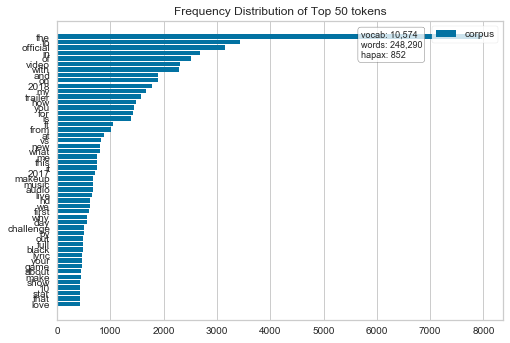

In [13]:
features = count_vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='h')
visualizer.fit(train_count_vector)
visualizer.show()

### Tokenizer words using TfidfTransformer
Will convert our count values from CountVectorizer into a frequency matrix

Term Frequency: How often a word appears in a particular title.
Inverse Document Frequency: Downscale this words that appear often across multiple titles.

Main purpose is to reduce the importance of stopwords that a common accross categories

In [21]:
tfidf_vectorizer = TfidfTransformer()
x_trained_tfidf_vector = tfidf_vectorizer.fit_transform(train_count_vector)
x_test_tfidf_vector = tfidf_vectorizer.transform(test_count_vector)

### Multinomial Naive Bayes Model Training
Train the MultinomialNB on our Tfidf matrix

In [22]:
clf_tfidf = MultinomialNB()
clf_tfidf.fit(x_trained_tfidf_vector, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Accuracy and Classification Report
Test the accuracy of our model usingth testing dataset

In [24]:
pred_tfidf = clf_tfidf.predict(x_test_tfidf_vector)
print("Accuracy: ", accuracy_score(y_test, pred_tfidf))
print(metrics.classification_report(y_test, pred_tfidf, target_names=target_names))
print(target_names)

Accuracy:  0.860927960927961
                       precision    recall  f1-score   support

       People & Blogs       1.00      0.20      0.33        91
        Entertainment       0.92      0.77      0.84       664
               Comedy       0.98      0.79      0.88       329
 Science & Technology       0.72      0.97      0.82      2016
     Film & Animation       0.99      0.75      0.86       495
      News & Politics       1.00      0.59      0.74       149
               Sports       0.89      0.91      0.90       823
                Music       0.91      0.96      0.93      1245
       Pets & Animals       0.96      0.85      0.90       523
            Education       0.00      0.00      0.00        10
        Howto & Style       0.96      0.72      0.82       660
     Autos & Vehicles       0.99      0.77      0.87       186
      Travel & Events       0.91      0.84      0.87       461
               Gaming       1.00      0.57      0.73        14
Nonprofits & Activism    

C:\Users\lukev\Anaconda3\envs\yt-trends\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix

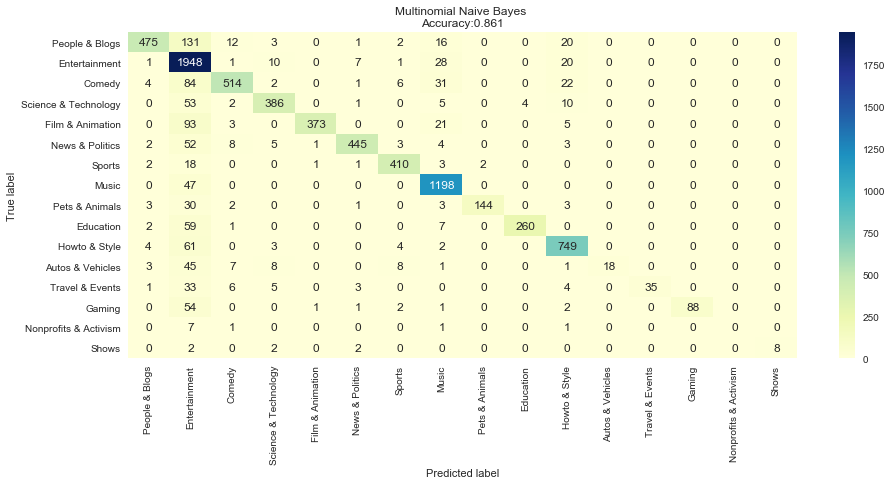

In [40]:
conf_matrix = confusion_matrix(y_test, pred_tfidf, labels=target_names)
conf_df = pd.DataFrame(conf_matrix, index=target_names, columns=target_names)

plt.figure(figsize=(15,6))
sns.heatmap(conf_df, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Multinomial Naive Bayes \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_tfidf)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [18]:
clf_count = MultinomialNB()
clf_count.fit(train_count_vector, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
pred_count = clf_count.predict(test_count_vector)
print("Accuracy: ", accuracy_score(y_test, pred_count))
print(metrics.classification_report(y_test, pred_count, target_names=target_names))

Accuracy:  0.8996336996336997
                       precision    recall  f1-score   support

       People & Blogs       0.93      0.75      0.83        91
        Entertainment       0.91      0.82      0.86       664
               Comedy       0.91      0.95      0.93       329
 Science & Technology       0.89      0.89      0.89      2016
     Film & Animation       0.93      0.88      0.90       495
      News & Politics       0.96      0.89      0.92       149
               Sports       0.85      0.92      0.89       823
                Music       0.92      0.96      0.94      1245
       Pets & Animals       0.92      0.93      0.92       523
            Education       1.00      0.20      0.33        10
        Howto & Style       0.91      0.83      0.87       660
     Autos & Vehicles       0.94      0.89      0.91       186
      Travel & Events       0.87      0.92      0.89       461
               Gaming       1.00      0.86      0.92        14
Nonprofits & Activism   

In [14]:
bern_count = BernoulliNB()
bern_count.fit(train_count_vector, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [15]:
bern_pred_count = bern_count.predict(test_count_vector)
print("Accuracy: ", accuracy_score(y_test, bern_pred_count))
print(metrics.classification_report(y_test, bern_pred_count, target_names=target_names))

Accuracy:  0.8511599511599511
                       precision    recall  f1-score   support

       People & Blogs       1.00      0.01      0.02        91
        Entertainment       0.83      0.82      0.82       664
               Comedy       0.96      0.79      0.86       329
 Science & Technology       0.81      0.91      0.85      2016
     Film & Animation       0.93      0.79      0.85       495
      News & Politics       1.00      0.41      0.58       149
               Sports       0.85      0.92      0.88       823
                Music       0.86      0.96      0.91      1245
       Pets & Animals       0.94      0.89      0.91       523
            Education       0.00      0.00      0.00        10
        Howto & Style       0.81      0.82      0.81       660
     Autos & Vehicles       1.00      0.54      0.70       186
      Travel & Events       0.82      0.88      0.85       461
               Gaming       0.00      0.00      0.00        14
Nonprofits & Activism   

C:\Users\lukev\Anaconda3\envs\yt-trends\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
